Random diagnostics sktechbook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist, squareform
from scipy.stats import spearmanr
from nilearn import signal
from matplotlib import pyplot as plt
import seaborn as sns

sys.path.append(os.path.join(os.path.dirname(os.getcwd()))) # add parent folder to path
from flow import Paths, design, voi
# from stats import matrix, rsa
# from figures.seqplots import plot_rdm

In [2]:
# plotting defaults
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}); # font and lines optimised for notebook
sns.set_style("dark");
sns.despine();
cmap = sns.cubehelix_palette(light=1, as_cmap=True); # default colourmap for the plots

<Figure size 432x288 with 0 Axes>

In [3]:
from nilearn._utils.glm import get_bids_files

In [2]:
roi = 25
Subject = '01'
File, Folder = Paths.SubjectData(Subject)

# between 2 ind R
# P = {'Phase': [1], 'IsLearned': [1]}
# Filter, Label = design.get_design(Subject, P, 'SeqId') 

# between 2 ind R
P = {'Phase': [1], 'IsLearned': [0,1]}
Filter, Label = design.get_design(Subject, P, 'SeqId') # between U and R
Label

ModuleNotFoundError: No module named 'nistats'

In [ ]:
# %autoreload voi
# file_pickle = File['VoisData']
# z, d, h = voi.get_score(Label, Filter, file_pickle, 'rsa')

In [34]:
data_ = pd.read_pickle(File['VoisData'])
data = data_['Data'][roi]
print(data.shape)
FilterZero = data[0][:] != 0  # filter out zero-columns
Y = data[Filter][:, FilterZero] # rows = conditions, colums = voxels
print(Y.shape)

(99, 2039)
(36, 1802)


/imaging/local/software/anaconda/2.4.1/2/envs/p36/lib/python3.6/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


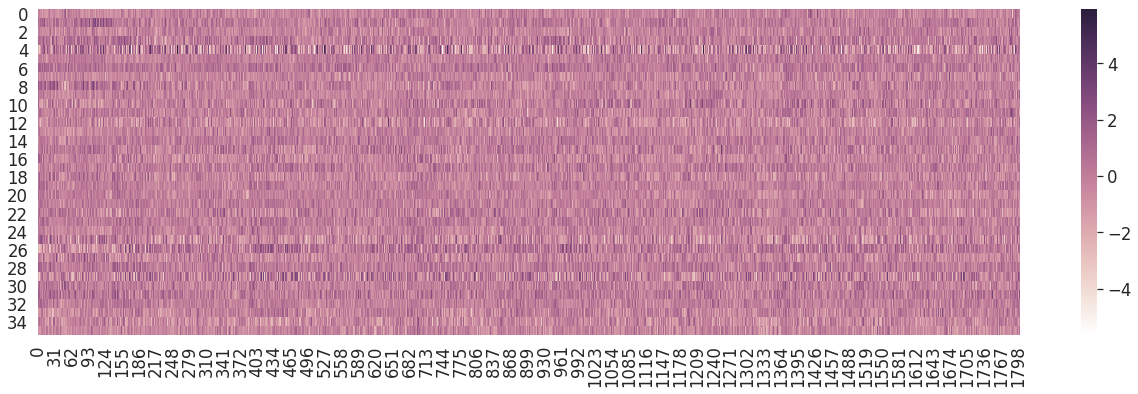

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(22,6));
fig = sns.heatmap(Y, cmap=cmap);

In [48]:
len(Label[Label > 2])

12

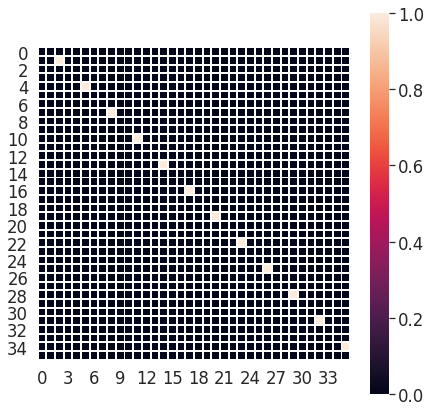

In [137]:
# design matrix
# we want the distance betw two different R seq at the same repetition
od = 1 # how many off-diagonal 
X = np.diag(np.ones(len(Label)-od),od)
xF = np.array(Label.values != 2)
# print(xF)
X[xF] = 0
fig = plt.figure(figsize=(7,7))
sns.heatmap(X, square=True, linewidths=1);

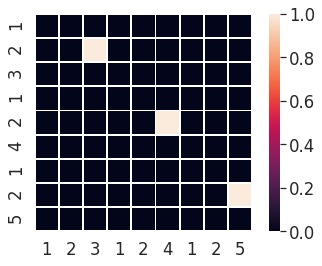

In [143]:
r = 9
ax = sns.heatmap(X[0:r][:,0:r], square=True, linewidths=1);
ax.set_xticklabels(Label.values[0:r]);
ax.set_yticklabels(Label.values[0:r]);

In [144]:
B = cdist(Y, Y, metric='mahalanobis')
d = B[np.where(X)]
d

ValueError: The number of observations (72) is too small; the covariance matrix is singular. For observations with 1802 dimensions, at least 1803 observations are required.

In [134]:
B = squareform(pdist(Y, metric='euclidean'))
d = B[np.where(X)]
d

array([42.79431896, 54.08767017, 52.40737276, 42.78236658, 60.75012716,
       56.84134347, 42.60326041, 46.51277104, 63.45240202, 85.04346189,
       45.57569066, 49.90443367])

In [87]:
Label.index[xx[0]]

Int64Index([0, 11, 22, 34, 45, 56, 67, 79, 90, 101, 112, 124], dtype='int64')

In [89]:
Z = pd.DataFrame(columns={'Label', 'd', 'Subject', 'Voi', 'model'})
Z.Label = np.arange(len(d))
Z.d = d
Z.Subject = np.ones(len(d)) * 3
Z.model = ['model' for i in d]
Z

Voi  Label  Subject         d  model
0   NaN      0      3.0  0.769829  model
1   NaN      1      3.0  1.020595  model
2   NaN      2      3.0  0.851304  model
3   NaN      3      3.0  0.817394  model
4   NaN      4      3.0  1.006882  model
5   NaN      5      3.0  0.968260  model
6   NaN      6      3.0  0.624245  model
7   NaN      7      3.0  0.997407  model
8   NaN      8      3.0  1.051861  model
9   NaN      9      3.0  1.307198  model
10  NaN     10      3.0  0.904931  model
11  NaN     11      3.0  0.754322  model

In [96]:
from flow import flow as flow_
%autoreload flow_
file_pickle = File['VoisData']
phase = 1
Z = flow_.voi_run_dist(Subject, phase, file_pickle)
# S = pd.read_csv(csv_file, sep='\t')

In [97]:
Z[(Z.analysis=='dUR_01') & (Z.Voi.isin([66]))]

labelname phase Voi Label Subject         d analysis
4700     SeqId     1  66     0      01  0.950242   dUR_01
4701     SeqId     1  66     1      01  1.174997   dUR_01
4702     SeqId     1  66     2      01  0.872469   dUR_01
4703     SeqId     1  66     3      01  0.934427   dUR_01
4704     SeqId     1  66     4      01  1.073794   dUR_01
4705     SeqId     1  66     5      01  1.029588   dUR_01
4706     SeqId     1  66     6      01  0.725209   dUR_01
4707     SeqId     1  66     7      01  1.084815   dUR_01
4708     SeqId     1  66     8      01  1.027440   dUR_01
4709     SeqId     1  66     9      01  1.112683   dUR_01
4710     SeqId     1  66    10      01  0.959356   dUR_01
4711     SeqId     1  66    11      01  0.955672   dUR_01

In [ ]:
S[(S.analysis=='dist_0') & (S.Voi==25)]